In [60]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
mat = io.loadmat('gain.mat')
gain_sameclus = mat['gain_sameclus']
gain_diffclus_crosspol = mat['gain_diffclus_crosspol']
gain_diffclus_samepol = mat['gain_diffclus_samepol']
azi_rot = mat['azi_rot']
ele_rot = mat['ele_rot']
realization = 1000
import seaborn as sns
from matplotlib import cm

Gain(Reali,Azimuth,Elevation)

In [2]:
angle_number=gain_sameclus.shape[1]
gain_sameclus_mean =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_crosspol_mean =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_samepol_mean =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_sameclus_var =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_crosspol_var =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_samepol_var =  np.zeros((angle_number,int(angle_number/2)),dtype=float)

for i in range(angle_number):
    for j in range(int(angle_number/2)):
        gain_sameclus_mean[i,j] = np.mean(gain_sameclus[:,i,j])
        gain_sameclus_var[i,j] = np.var(gain_sameclus[:,i,j])
        
        gain_diffclus_crosspol_mean[i,j] = np.mean(gain_diffclus_crosspol[:,i,j])
        gain_diffclus_crosspol_var[i,j] = np.var(gain_diffclus_crosspol[:,i,j])
        
        gain_diffclus_samepol_mean[i,j] = np.mean(gain_diffclus_samepol[:,i,j])
        gain_diffclus_samepol_var[i,j] = np.var(gain_diffclus_samepol[:,i,j])

In [3]:
# print(gain_sameclus_mean==gain_diffclus_samepol)
print(gain_sameclus_mean==gain_diffclus_crosspol_mean)
print(gain_diffclus_samepol_mean)
print(gain_diffclus_samepol_mean)

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
[[ 18.81151816  18.49229512  17.55798455 ...,  17.56085082  18.49390147
   18.81151816]
 [ 18.65863471  18.34192537  17.41534449 ...,  17.41807656  18.34352452
   18.65863471]
 [ 18.2081288   17.89972606  16.99591661 ...,  16.99711068  17.90050237
   18.2081288 ]
 ..., 
 [ 18.2081288   17.89972606  16.99591661 ...,  16.99711068  17.90050237
   18.2081288 ]
 [ 18.65863471  18.34192537  17.41534449 ...,  17.41807656  18.34352452
   18.65863471]
 [ 18.81151816  18.49229512  17.55798455 ...,  17.56085082  18.49390147
   18.81151816]]
[[ 18.81151816  18.49229512  17.55798455 ...,  17.56085082  18.49390147
   18.81151816]
 [ 18.65863471  18.34192537  17.41534449 ...,  17.41807656  18.34352452
   18.65863471]
 [ 18.2081288   

In [4]:
print(gain_sameclus_var)
print('-----------')
print(gain_diffclus_crosspol_var)
print('-----------')
print(gain_diffclus_samepol_var)

[[ 100.64579249  101.55577757  110.07574652 ...,  121.83380134  108.231309
   100.64579249]
 [  98.89587778  100.48092369  109.48743182 ...,  118.45704656  105.6879037
    98.89587778]
 [  93.92242937   97.41134944  107.79824499 ...,  108.83114062
    98.43274506   93.92242937]
 ..., 
 [  93.92242937   97.41134944  107.79824499 ...,  108.83114062
    98.43274506   93.92242937]
 [  98.89587778  100.48092369  109.48743182 ...,  118.45704656  105.6879037
    98.89587778]
 [ 100.64579249  101.55577757  110.07574652 ...,  121.83380134  108.231309
   100.64579249]]
-----------
[[ 0.01477178  0.08946115  0.78832148 ...,  0.74825888  0.08190065
   0.01477178]
 [ 0.01451862  0.08795502  0.77507361 ...,  0.73550088  0.08047781
   0.01451862]
 [ 0.01379256  0.08363343  0.7370202  ...,  0.69891451  0.07639327
   0.01379256]
 ..., 
 [ 0.01379256  0.08363343  0.7370202  ...,  0.69891451  0.07639327
   0.01379256]
 [ 0.01451862  0.08795502  0.77507361 ...,  0.73550088  0.08047781
   0.01451862]
 [ 0.

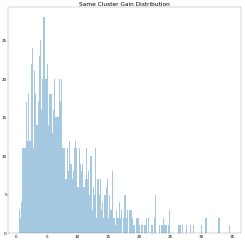

In [5]:
fig = plt.figure(figsize=(20,20), dpi=15)

plt.subplot(1, 1, 1)
plt.title('Same Cluster Gain Distribution', fontsize = 28)
sns.distplot(gain_diffclus_samepol[:,9,4],bins=180, kde = False)
# plt.xlim(0,100)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [6]:
print(azi_rot.shape)
print(ele_rot.shape)
print(azi_rot)
print(ele_rot)

(1, 50)
(1, 25)
[[ 0.          0.12822827  0.25645654  0.38468481  0.51291309  0.64114136
   0.76936963  0.8975979   1.02582617  1.15405444  1.28228272  1.41051099
   1.53873926  1.66696753  1.7951958   1.92342407  2.05165235  2.17988062
   2.30810889  2.43633716  2.56456543  2.6927937   2.82102197  2.94925025
   3.07747852  3.20570679  3.33393506  3.46216333  3.5903916   3.71861988
   3.84684815  3.97507642  4.10330469  4.23153296  4.35976123  4.48798951
   4.61621778  4.74444605  4.87267432  5.00090259  5.12913086  5.25735913
   5.38558741  5.51381568  5.64204395  5.77027222  5.89850049  6.02672876
   6.15495704  6.28318531]]
[[ 0.          0.13089969  0.26179939  0.39269908  0.52359878  0.65449847
   0.78539816  0.91629786  1.04719755  1.17809725  1.30899694  1.43989663
   1.57079633  1.70169602  1.83259571  1.96349541  2.0943951   2.2252948
   2.35619449  2.48709418  2.61799388  2.74889357  2.87979327  3.01069296
   3.14159265]]


In [7]:
print(gain_sameclus_mean)
print('-----------')
print(gain_diffclus_crosspol_mean)
print('-----------')
print(gain_diffclus_samepol_mean)

[[ 13.07753546  13.22773539  13.55838861 ...,  13.50537433  13.19358438
   13.07753546]
 [ 12.97070365  13.15564605  13.5127002  ...,  13.33007928  13.05097585
   12.97070365]
 [ 12.65854927  12.94545934  13.37868131 ...,  12.81642972  12.6331352
   12.65854927]
 ..., 
 [ 12.65854927  12.94545934  13.37868131 ...,  12.81642972  12.6331352
   12.65854927]
 [ 12.97070365  13.15564605  13.5127002  ...,  13.33007928  13.05097585
   12.97070365]
 [ 13.07753546  13.22773539  13.55838861 ...,  13.50537433  13.19358438
   13.07753546]]
-----------
[[ 0.18488441  0.48117855  1.4157783  ...,  1.39009645  0.47525669
   0.18488441]
 [ 0.18334181  0.47732102  1.40423265 ...,  1.3786617   0.47127059
   0.18334181]
 [ 0.1788078   0.46597421  1.37022211 ...,  1.34501826  0.45959752
   0.1788078 ]
 ..., 
 [ 0.1788078   0.46597421  1.37022211 ...,  1.34501826  0.45959752
   0.1788078 ]
 [ 0.18334181  0.47732102  1.40423265 ...,  1.3786617   0.47127059
   0.18334181]
 [ 0.18488441  0.48117855  1.4157783 

In [8]:
total_gain = np.zeros((3,angle_number,int(angle_number/2)))
total_gain[0,:,:]=gain_sameclus_mean
total_gain[1,:,:]=gain_diffclus_crosspol_mean
total_gain[2,:,:]=gain_diffclus_samepol_mean
index_gain_max = np.argmax(total_gain, axis=0)
# print(total_gain[index_gain_max])
gain_max=np.max(total_gain,axis=0)

In [9]:
print(index_gain_max)
print(gain_max)

[[2 2 2 ..., 2 2 2]
 [2 2 2 ..., 2 2 2]
 [2 2 2 ..., 2 2 2]
 ..., 
 [2 2 2 ..., 2 2 2]
 [2 2 2 ..., 2 2 2]
 [2 2 2 ..., 2 2 2]]
[[ 18.81151816  18.49229512  17.55798455 ...,  17.56085082  18.49390147
   18.81151816]
 [ 18.65863471  18.34192537  17.41534449 ...,  17.41807656  18.34352452
   18.65863471]
 [ 18.2081288   17.89972606  16.99591661 ...,  16.99711068  17.90050237
   18.2081288 ]
 ..., 
 [ 18.2081288   17.89972606  16.99591661 ...,  16.99711068  17.90050237
   18.2081288 ]
 [ 18.65863471  18.34192537  17.41534449 ...,  17.41807656  18.34352452
   18.65863471]
 [ 18.81151816  18.49229512  17.55798455 ...,  17.56085082  18.49390147
   18.81151816]]


In [10]:
aazi, eele = np.meshgrid(azi_rot, ele_rot, sparse=False, indexing='ij')
print(aazi)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.12822827  0.12822827  0.12822827 ...,  0.12822827  0.12822827
   0.12822827]
 [ 0.25645654  0.25645654  0.25645654 ...,  0.25645654  0.25645654
   0.25645654]
 ..., 
 [ 6.02672876  6.02672876  6.02672876 ...,  6.02672876  6.02672876
   6.02672876]
 [ 6.15495704  6.15495704  6.15495704 ...,  6.15495704  6.15495704
   6.15495704]
 [ 6.28318531  6.28318531  6.28318531 ...,  6.28318531  6.28318531
   6.28318531]]


In [11]:
test = np.unravel_index(gain_max.argmin(), gain_max.shape)
print(np.min(gain_max))
print(gain_diffclus_crosspol_mean[37,18])
print(gain_diffclus_samepol_mean[37,18])
print(gain_sameclus_mean[37,18])
print(np.mean(gain_diffclus_crosspol_mean))
print(np.mean(gain_diffclus_samepol_mean))
print(np.mean(gain_sameclus_mean))


3.96731316796
3.95886150448
3.96731316796
0.0148843919372
6.7130020068
7.25997228418
10.4862975718


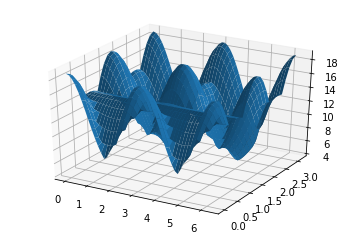

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# x = np.random.standard_normal(100)
# y = np.random.standard_normal(100)
# z = np.random.standard_normal(100)
# c = np.random.standard_normal(100)

ax.plot_surface(aazi, eele, gain_max)

plt.show()

In [13]:
print(np.max(gain_max))
print(np.max(gain_sameclus_mean))
print(np.max(gain_diffclus_crosspol_mean))
print(np.max(gain_diffclus_samepol_mean))
print(np.mean(gain_sameclus_mean))
print(np.mean(gain_diffclus_crosspol_mean))
print(np.mean(gain_diffclus_samepol_mean))

18.9154231052
14.6962702569
18.9154231052
18.876778489
10.4862975718
6.7130020068
7.25997228418


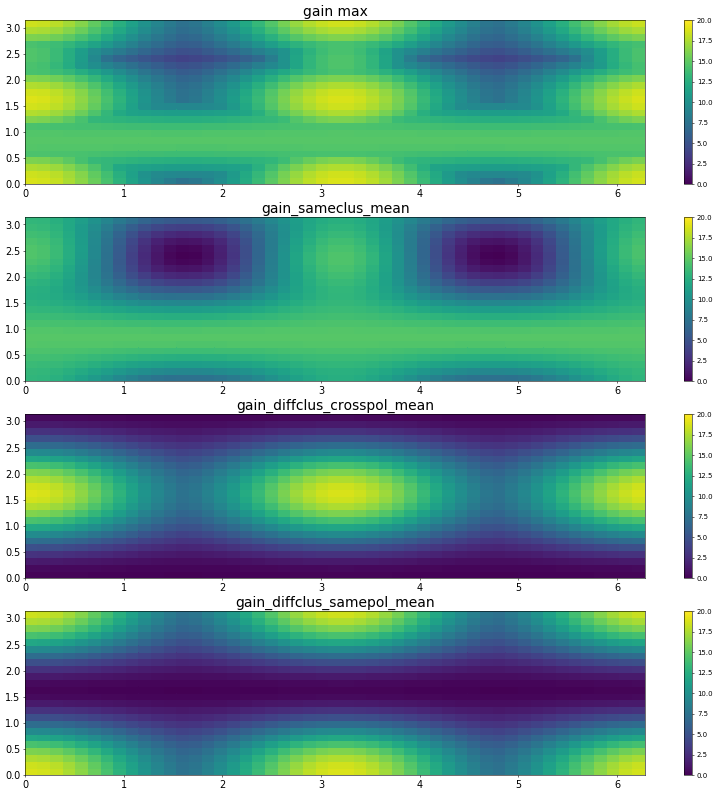

In [14]:
fig = plt.figure(figsize=(20,20), dpi=50)
plt.subplot(4, 1, 1)
plt.title('gain max', fontsize = 20)
plt.colorbar(plt.pcolor(aazi, eele, gain_max,vmin=0, vmax=20))
plt.tick_params(labelsize=14)

plt.subplot(4, 1, 2)
plt.title('gain_sameclus_mean', fontsize = 20)
plt.colorbar(plt.pcolor(aazi, eele, gain_sameclus_mean,vmin=0, vmax=20))
plt.tick_params(axis='both', which='major', labelsize=14)

plt.subplot(4, 1, 3)
plt.title('gain_diffclus_crosspol_mean', fontsize = 20)
plt.colorbar(plt.pcolor(aazi, eele, gain_diffclus_crosspol_mean,vmin=0, vmax=20))
plt.tick_params(axis='both', which='major', labelsize=14)

plt.subplot(4, 1, 4)
plt.title('gain_diffclus_samepol_mean', fontsize = 20)
plt.colorbar(plt.pcolor(aazi, eele, gain_diffclus_samepol_mean,vmin=0, vmax=20))
plt.tick_params(axis='both', which='major', labelsize=14)


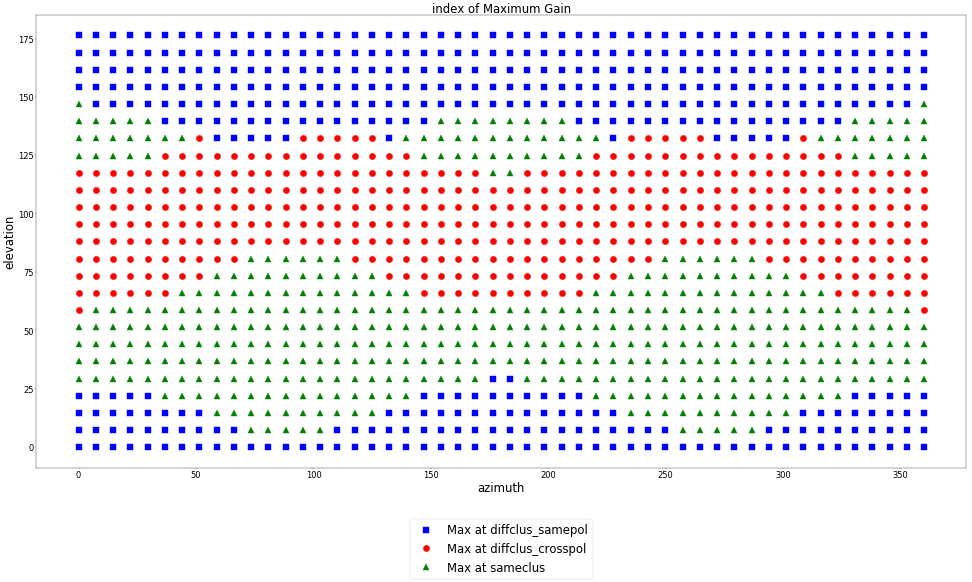

In [29]:
azi_diffclus_samepol,ele_diffclus_samepol = np.where( index_gain_max==2 )
azi_diffclus_crosspol,ele_diffclus_crosspol = np.where( index_gain_max==1 )
azi_sameclus,ele_sameclus = np.where( index_gain_max==0 )


fig = plt.figure(figsize=(40,20), dpi=30)
plt.plot(azi_diffclus_samepol*360/(angle_number-1),ele_diffclus_samepol*360/(angle_number-1),'bs', markersize = 15, label="Max at diffclus_samepol")
plt.plot(azi_diffclus_crosspol*360/(angle_number-1),ele_diffclus_crosspol*360/(angle_number-1),'ro', markersize = 15, label="Max at diffclus_crosspol")
plt.plot(azi_sameclus*360/(angle_number-1),ele_sameclus*360/(angle_number-1),'g^', markersize = 15, label="Max at sameclus")
plt.title('index of Maximum Gain', fontsize = 28)
plt.xlabel('azimuth',fontsize=28)
plt.ylabel('elevation',fontsize=28)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), prop={'size': 28})
plt.tick_params(axis='both', which='major', labelsize=20)

In [85]:
boundary_1 = np.zeros((2,angle_number))
boundary_2 = np.zeros((2,angle_number))
boundary_3 = np.zeros((2,angle_number))
boundary_4 = np.zeros((2,angle_number))

for i in range(angle_number):
    for j in range(int(angle_number/2)):
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_1[0,i] = i
            boundary_1[1,i] = (j+j+1)/2
            break
            
for i in range(angle_number):
    for j in range(ceil(boundary_1[1,i]),int(angle_number/2)):
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_2[0,i] = i
            boundary_2[1,i] = (j+j+1)/2
            break
            
for i in range(angle_number):
    for j in range(ceil(boundary_2[1,i]),int(angle_number/2)):
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_3[0,i] = i
            boundary_3[1,i] = (j+j+1)/2
            break
            
for i in range(angle_number):
    for j in range(ceil(boundary_3[1,i]),int(angle_number/2)):
        if j+1 == int(angle_number)/2:
            break
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_4[0,i] = i
            boundary_4[1,i] = (j+j+1)/2
            break

(0, 180)

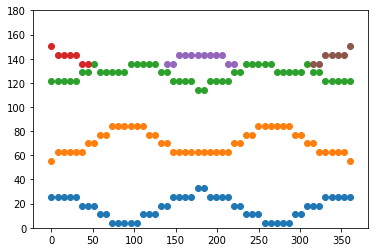

In [96]:
boundary_4_1 = boundary_4[:,:7]
boundary_4_2 = boundary_4[:,19:31]
boundary_4_3 = boundary_4[:,43:50]

plt.scatter(boundary_1[0,:]*360/(angle_number-1),boundary_1[1,:]*360/(angle_number-1))

plt.scatter(boundary_2[0,:]*360/(angle_number-1),boundary_2[1,:]*360/(angle_number-1))

plt.scatter(boundary_3[0,:]*360/(angle_number-1),boundary_3[1,:]*360/(angle_number-1))

plt.scatter(boundary_4_1[0,:]*360/(angle_number-1),boundary_4_1[1,:]*360/(angle_number-1))
plt.scatter(boundary_4_2[0,:]*360/(angle_number-1),boundary_4_2[1,:]*360/(angle_number-1))
plt.scatter(boundary_4_3[0,:]*360/(angle_number-1),boundary_4_3[1,:]*360/(angle_number-1))

plt.ylim(0,180)
